In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
from PIL import Image

In [4]:
import requests

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
books=pd.read_csv('books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [9]:
books.shape

(10000, 23)

In [10]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [11]:
ratings=pd.read_csv('ratings.csv')
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [12]:
book_tags=pd.read_csv('book_tags.csv')
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [13]:
tags=pd.read_csv('tags.csv')
tags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


The purpose of using left_on and right_on is to handle cases where the columns you want to merge on have different names in the two DataFrames. If the columns you want to merge on have the same name in both DataFrames, you can use the on parameter instead, like this:
tags_join_DF = pd.merge(book_tags, tags, on='tag_id', how='inner')

In [14]:
tags_merged = pd.merge(book_tags, tags, on='tag_id', how='inner')
tags_merged.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [15]:
to_read = pd.read_csv('to_read.csv')
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [16]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(books['authors'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [17]:
tfidf_matrix

<10000x14800 sparse matrix of type '<class 'numpy.float64'>'
	with 43199 stored elements in Compressed Sparse Row format>

In [18]:
cosine_sim[1][0]

0.0

In [19]:
# Convert the sparse matrix to a dense matrix
dense_matrix = tfidf_matrix.todense()

# Display the TF-IDF matrix
import pandas as pd

# Create a DataFrame for better visualization
df_tfidf = pd.DataFrame(dense_matrix, columns=tf.get_feature_names_out())

# Display the TF-IDF matrix
print(df_tfidf)


      aardema  aardema leo  aaron  aaron alexovich  aaron asher  aaron ehasz  \
0         0.0          0.0    0.0              0.0          0.0          0.0   
1         0.0          0.0    0.0              0.0          0.0          0.0   
2         0.0          0.0    0.0              0.0          0.0          0.0   
3         0.0          0.0    0.0              0.0          0.0          0.0   
4         0.0          0.0    0.0              0.0          0.0          0.0   
...       ...          ...    ...              ...          ...          ...   
9995      0.0          0.0    0.0              0.0          0.0          0.0   
9996      0.0          0.0    0.0              0.0          0.0          0.0   
9997      0.0          0.0    0.0              0.0          0.0          0.0   
9998      0.0          0.0    0.0              0.0          0.0          0.0   
9999      0.0          0.0    0.0              0.0          0.0          0.0   

      aaron johnston  aaron leichter  a

In [20]:
type(df_tfidf)

pandas.core.frame.DataFrame

In [21]:
# Build a 1-dimensional array with book titles
titles = books['title']
indices = pd.Series(books.index, index=books['title'])

In [22]:
indices

title
The Hunger Games (The Hunger Games, #1)                                                         0
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)                                        1
Twilight (Twilight, #1)                                                                         2
To Kill a Mockingbird                                                                           3
The Great Gatsby                                                                                4
                                                                                             ... 
Bayou Moon (The Edge, #2)                                                                    9995
Means of Ascent (The Years of Lyndon Johnson, #2)                                            9996
The Mauritius Command                                                                        9997
Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture    9998
The First Worl

In [23]:
# Function that get book recommendations based on the cosine similarity score of book authors
def authors_recommendations(title):
    idx = indices[title]
    print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    #Enumerates the cosine similarity scores of the input book with all other books and stores them in a list.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    print(sim_scores[1][1])
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [24]:
authors_recommendations('Harry Potter and the Order of the Phoenix (Harry Potter, #5, Part 1)').head(20)

6140
1.0


398                          The Tales of Beedle the Bard
421              Harry Potter Boxset (Harry Potter, #1-7)
3752         Harry Potter Collection (Harry Potter, #1-6)
4640    Fantastic Beasts and Where to Find Them: The O...
6140    Harry Potter and the Order of the Phoenix (Har...
7522    Hogwarts: An Incomplete and Unreliable Guide (...
9047    Harry Potter Schoolbooks Box Set: Two Classic ...
6427    Short Stories from Hogwarts of Heroism, Hardsh...
7442    Short Stories from Hogwarts of Power, Politics...
1       Harry Potter and the Sorcerer's Stone (Harry P...
20      Harry Potter and the Order of the Phoenix (Har...
22      Harry Potter and the Chamber of Secrets (Harry...
23      Harry Potter and the Goblet of Fire (Harry Pot...
24      Harry Potter and the Deathly Hallows (Harry Po...
26      Harry Potter and the Half-Blood Prince (Harry ...
2100    The Harry Potter Collection 1-4 (Harry Potter,...
3274    Harry Potter Boxed Set, Books 1-5 (Harry Potte...
252           

In [25]:
tags_merged

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read
...,...,...,...,...
999907,31538635,14690,6,hogwarts
999908,32848471,16149,21,jan-2017
999909,33288638,27821,9,single-mom
999910,33288638,11478,7,fave-author


In [26]:
books_with_tags = pd.merge(books, tags_merged, left_on='book_id', right_on='goodreads_book_id', how='inner')

In [27]:
books_with_tags['tag_name']

0                         to-read
1                         fantasy
2                       favorites
3               currently-reading
4                     young-adult
                   ...           
999907                john-keegan
999908                  world-war
999909                    war-ww1
999910    modern-european-history
999911                wwi-general
Name: tag_name, Length: 999912, dtype: object

In [28]:
tf1 = TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=0, stop_words='english')
tfidf_matrix1 = tf1.fit_transform(books_with_tags['tag_name'].head(10000))
cosine_sim1 = linear_kernel(tfidf_matrix1, tfidf_matrix1)

In [29]:
tfidf_matrix1

<10000x1381 sparse matrix of type '<class 'numpy.float64'>'
	with 18605 stored elements in Compressed Sparse Row format>

In [31]:
# Build a 1-dimensional array with book titles
titles1 = books['title']
indices1 = pd.Series(books.index, index=books['title'])

# Function that get book recommendations based on the cosine similarity score of books tags
def tags_recommendations(title):
    idx = indices1[title]
    sim_scores = list(enumerate(cosine_sim1[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [32]:
tags_recommendations('The Hobbit').head(20)

16                  Catching Fire (The Hunger Games, #2)
31                                       Of Mice and Men
107         Confessions of a Shopaholic (Shopaholic, #1)
125                            Dune (Dune Chronicles #1)
149                                         The Red Tent
206               One for the Money (Stephanie Plum, #1)
214                                     Ready Player One
231                  The Gunslinger (The Dark Tower, #1)
253               Shiver (The Wolves of Mercy Falls, #1)
313                              Inkheart (Inkworld, #1)
325                                       White Oleander
405       The New Drawing on the Right Side of the Brain
412                                 The Three Musketeers
425                              A Confederacy of Dunces
505                          The One (The Selection, #3)
513                    The Adventures of Sherlock Holmes
525                  Darkly Dreaming Dexter (Dexter, #1)
566                            

In [33]:
books_with_tags

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,tag_id,count,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,30574,11314,to-read
1,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,11305,10836,fantasy
2,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,11557,50755,favorites
3,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,8717,35418,currently-reading
4,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,33114,25968,young-adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999907,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,8914,16529,4,john-keegan
999908,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,8914,32805,3,world-war
999909,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,8914,32156,3,war-ww1
999910,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,8914,20285,3,modern-european-history


In [34]:
temp_df = books_with_tags.groupby('book_id')['tag_name'].apply(' '.join).reset_index()
temp_df.head()

,book_id,tag_name
0,1,to-read fantasy favorites currently-reading yo...
1,2,to-read fantasy favorites currently-reading yo...
2,3,to-read fantasy favorites currently-reading yo...
3,5,to-read fantasy favorites currently-reading yo...
4,6,to-read fantasy young-adult fiction harry-pott...


In [35]:
temp_df

,book_id,tag_name
0,1,to-read fantasy favorites currently-reading yo...
1,2,to-read fantasy favorites currently-reading yo...
2,3,to-read fantasy favorites currently-reading yo...
3,5,to-read fantasy favorites currently-reading yo...
4,6,to-read fantasy young-adult fiction harry-pott...
...,...,...
9995,31538647,to-read fantasy favorites currently-reading yo...
9996,31845516,to-read favorites currently-reading fiction bo...
9997,32075671,to-read favorites currently-reading young-adul...
9998,32848471,to-read favorites currently-reading fiction bo...


In [36]:
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [37]:
books = pd.merge(books, temp_df, left_on='book_id', right_on='book_id', how='inner')
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,to-read fantasy favorites currently-reading yo...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,to-read fantasy favorites currently-reading yo...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,to-read fantasy favorites currently-reading yo...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,to-read favorites currently-reading young-adul...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,to-read favorites currently-reading young-adul...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,to-read fantasy favorites currently-reading fi...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,to-read favorites currently-reading books-i-ow...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...,to-read favorites currently-reading fiction bo...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,to-read favorites currently-reading books-i-ow...


In [38]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url', 'tag_name'],
      dtype='object')

In [39]:
books['corpus'] = (pd.Series(books[['authors', 'tag_name']].fillna('').values.tolist()).str.join(' '))
books['corpus']

0       Suzanne Collins to-read fantasy favorites curr...
1       J.K. Rowling, Mary GrandPré to-read fantasy fa...
2       Stephenie Meyer to-read fantasy favorites curr...
3       Harper Lee to-read favorites currently-reading...
4       F. Scott Fitzgerald to-read favorites currentl...
                              ...                        
9995    Ilona Andrews to-read fantasy favorites curren...
9996    Robert A. Caro to-read favorites currently-rea...
9997    Patrick O'Brian to-read favorites currently-re...
9998    Peggy Orenstein to-read favorites currently-re...
9999    John Keegan to-read favorites currently-readin...
Name: corpus, Length: 10000, dtype: object

In [40]:
tf_corpus = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_corpus = tf_corpus.fit_transform(books['corpus'])
cosine_sim_corpus = linear_kernel(tfidf_matrix_corpus, tfidf_matrix_corpus)


In [41]:
# Build a 1-dimensional array with book titles
titles = books['title']
indices = pd.Series(books.index, index=books['title'])

# Function that get book recommendations based on the cosine similarity score of books tags
def corpus_recommendations(title):
    idx = indices1[title]
    global sim_scores
    sim_scores = list(enumerate(cosine_sim_corpus[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:10]
    book_indices = [i[0] for i in sim_scores]
    
    books_img = []
    url=[]
    avg_rating=[]
    for i in range(len(sim_scores)):
        books_img.append(books[books.index == sim_scores[i][0]]['title'].item())
        url.append(books[books.index == sim_scores[i][0]]['image_url'].item())
        avg_rating.append(books[books.index == sim_scores[i][0]]['average_rating'].item())
    fig, axs = plt.subplots(1, 5,figsize=(18,5))
    fig.suptitle('You may also like these books', size = 22)
    for i in range(len(books_img)):
        #url = books.loc[books['title'] == books_img[i],'image_url'][:1].values[0]
        im = Image.open(requests.get(url[i], stream=True).raw)
        axs[i].imshow(im)
        axs[i].axis("off")
        axs[i].set_title("avg ratings : "+str(avg_rating[i]),y=-0.18,color="red",fontsize=15)
        fig.show()
    
    
    
    return titles.iloc[book_indices]

In [42]:
# Assuming you have already imported necessary libraries and have 'books', 'cosine_sim_corpus', and 'indices1' defined

# Build a 1-dimensional array with book titles and create indices
titles = books['title']
indices = pd.Series(books.index, index=books['title'])

# Function that gets book recommendations based on the cosine similarity score of books tags
def corpus_recommendations(title):
    idx = indices.get(title)  # Use .get() to handle cases where the title is not in indices
    if idx is None:
        print(f"Book with title '{title}' not found.")
        return

    global sim_scores
    sim_scores = list(enumerate(cosine_sim_corpus[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[:5]
    book_indices = [i[0] for i in sim_scores]
    
    books_img = []
    url = []
    avg_rating = []
    
    for i in range(len(sim_scores)):
        book_idx = sim_scores[i][0]
        books_img.append(books.loc[book_idx, 'title'])
        url.append(books.loc[book_idx, 'image_url'])
        avg_rating.append(books.loc[book_idx, 'average_rating'])

    fig, axs = plt.subplots(1, 5, figsize=(18, 5))
    fig.suptitle('You may also like these books', size=22)

    for i in range(len(books_img)):
        im = Image.open(requests.get(url[i], stream=True).raw)
        axs[i].imshow(im)
        axs[i].axis("off")
        axs[i].set_title(f"Avg Ratings: {avg_rating[i]:.2f}", y=-0.18, color="red", fontsize=15)

    plt.show()

    return titles.iloc[book_indices]


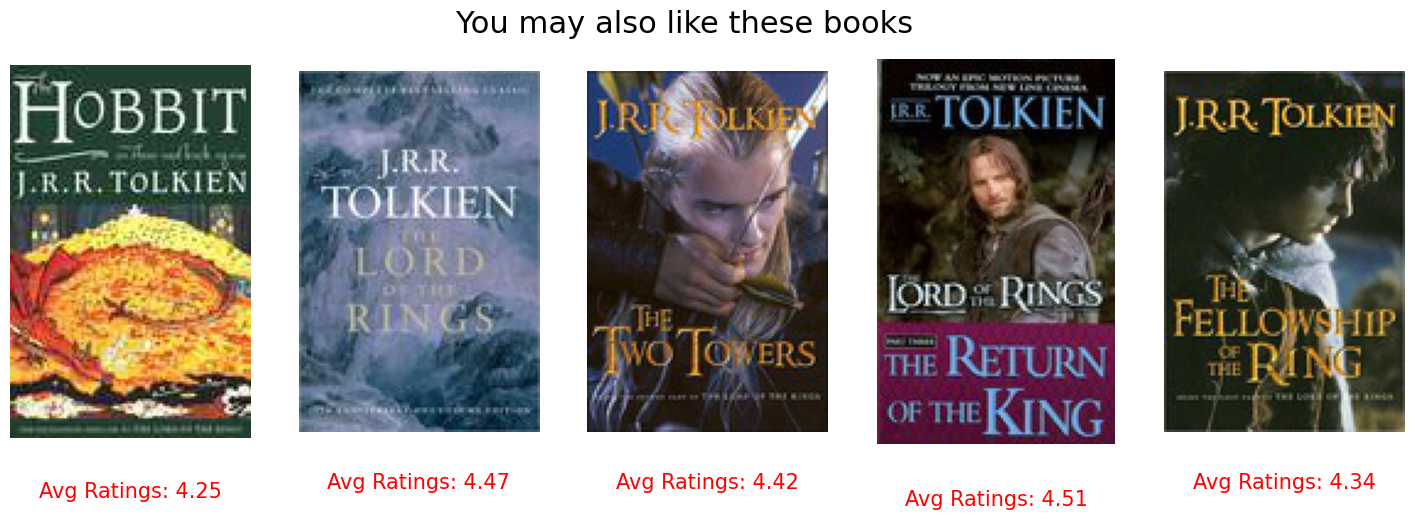

6                                             The Hobbit
188    The Lord of the Rings (The Lord of the Rings, ...
154           The Two Towers (The Lord of the Rings, #2)
160    The Return of the King (The Lord of the Rings,...
18     The Fellowship of the Ring (The Lord of the Ri...
Name: title, dtype: object

In [43]:
corpus_recommendations("The Hobbit")

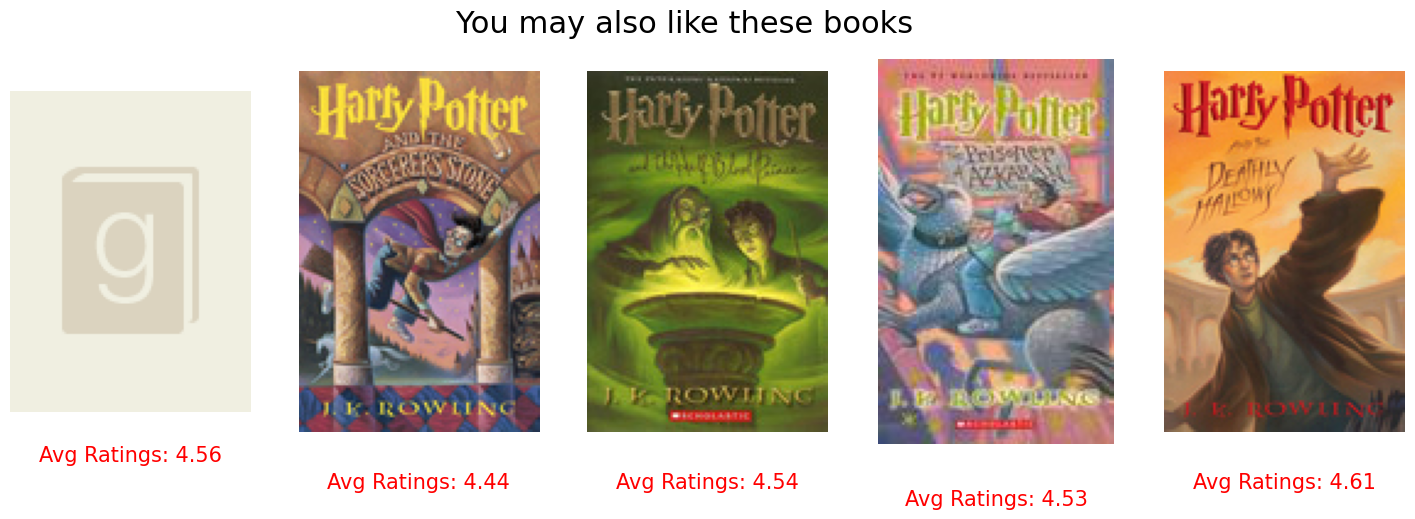

6140    Harry Potter and the Order of the Phoenix (Har...
1       Harry Potter and the Sorcerer's Stone (Harry P...
26      Harry Potter and the Half-Blood Prince (Harry ...
17      Harry Potter and the Prisoner of Azkaban (Harr...
24      Harry Potter and the Deathly Hallows (Harry Po...
Name: title, dtype: object

In [45]:
corpus_recommendations('Harry Potter and the Order of the Phoenix (Harry Potter, #5, Part 1)')